# Quantum Teleportation 

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

### Number of qubits that will be "teleported" 

In [2]:
n = 2
circuit = QuantumCircuit(3*n,3*n)

### Original states that will be teleported

In [3]:
circuit.x(0)
circuit.x(1)
#circuit.x(2)
#......
circuit.barrier()

### Entaglement (seperate between each couple of qubits)

In [4]:
circuit.h(range(n,2*n))

j = 0
for i in range(n,2*n):
    circuit.cx(i,2*n+j)
    j+=1

circuit.barrier()

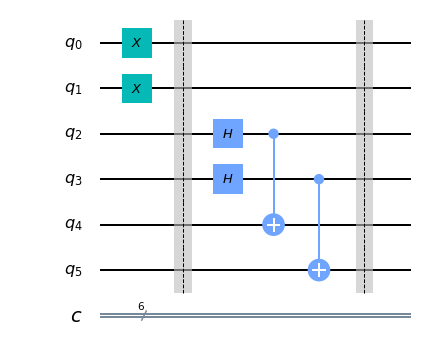

In [5]:
circuit.draw(output='mpl')

### Teleportation circuit

In [6]:
j = 0
for i in range(n):
    circuit.cx(i,n+j)
    j+=1

circuit.h(range(n))

circuit.measure(range(2*n),range(2*n))    
circuit.barrier()

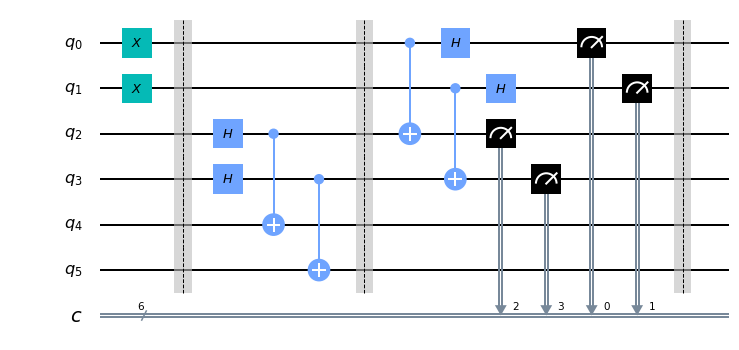

In [7]:
circuit.draw(output='mpl')

### Receiver Circuit

In [8]:
j = 0
for i in range(n):
    circuit.cx(n+j,2*n+j)
    circuit.cz(i,2*n+j)
    j+=1
    
circuit.measure(range(2*n,3*n),range(2*n,3*n))

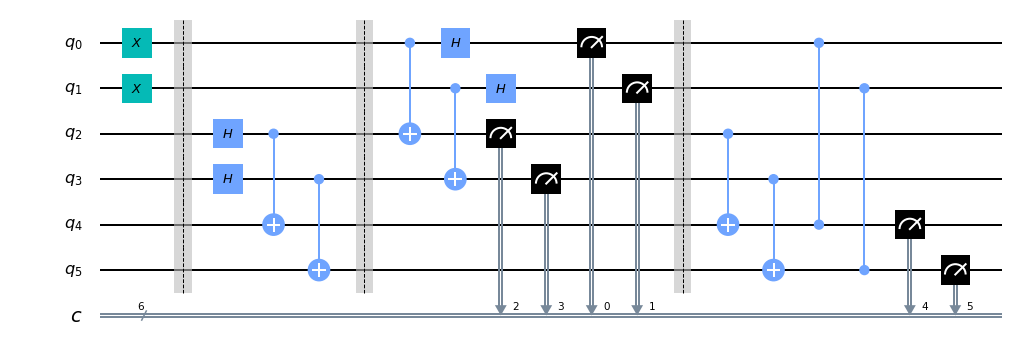

In [9]:
circuit.draw(output='mpl')

### Execute on Simulator

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator,shots = 1024).result()
counts = result.get_counts()

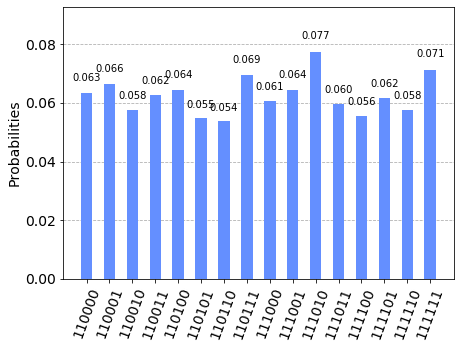

In [11]:
plot_histogram(counts)

As we can observe qubits Q_n and Q_(n-1) will now be in the state we originally set Q_0 and Q_1. In this particular example |11> 

### Execute on real Device

In [ ]:
#IBMQ.save_account()  # use your API token from the IBM Quantum
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomputer = provider.get_backend('') # choose a device with the right ammount of qubits
job = execute(circuit, backend = qcomputer)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
result = job.result()
plot_histogram(result.get_counts(circuit))